 ### Problem 1: Accuracy of Monte Carlo Method: using $\pi$ computation as an example
 There are two ways to compute the constant $\pi$:
 * The analytical solution based on the Gregory Series
 >see https://mathworld.wolfram.com/GregorySeries.html
 * A simple "stone-throwing" Monte Carlo Simulation (discussed previously)

In this "do yourself" section, you will compare the convergence speed of the two methods and also study the accuracy of Monte Carlo Method. 
Specifically, you need to 
* write a program to compute the constant $\pi$ using Gregory_Series. The input to this program is the number of terms in the Gregory Series, i.e., N=100 means that the constant $\pi$ is computed by a summation of 100 terms of Gregory Series
* Write a Monte Carlo program to estimate the constant $\pi$. The input to this program is the number of random event, i.e., N=100 means that the constant $\pi$ is computed by "throwing" 100 stones.
* plot a figure to compare the convergence speed of the two methods, i.e. the errors of $\pi$ from both methods compared to the $\pi$ from numpy as a function of the number N (as explained above). Discuss your results.
* plot and analyze the **absolute** error of $\pi$ from the Monte Carlo method in log-log scale (i.e. use logarithmic scales for both x and y axes) as a function of N.
> The error of Monte Carlo Method reduces as a function of $1/\sqrt{N}$ where $N$ is the number of random process. 
* overplot the theoretical expectation of error reduction $1/\sqrt{N}$ in the plot above


### Note: Write your code above the plot cell to compare your plot with the one mentioned in the cell.

## Expected plots:

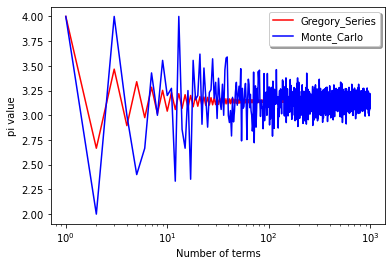

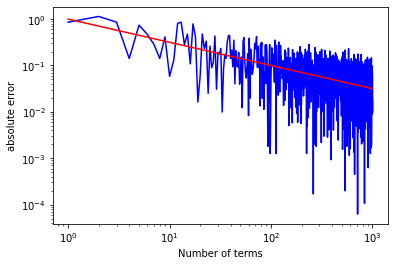

In [2]:
import numpy as np
from scipy.optimize import curve_fit
import matplotlib.pyplot as plt
%matplotlib inline

## Gregory series

The Gregory series is a $\pi$ formula found by Gregory and Leibniz and obtained by plugging $x=1$ into the Leibniz series,
$$\frac{\pi}{4}=\sum_{k=1}^{\infty} \frac{(-1)^{k+1}}{2k-1}$$ Truncating this series to $N$ terms to approximate the value of $\pi$; $$\frac{\pi}{4}\approx \sum_{k=1}^{N} \frac{(-1)^{k+1}}{2k-1}$$ $$\implies \pi \approx 4\sum_{k=1}^{N} \frac{(-1)^{k+1}}{2k-1}$$

In [3]:
def Gregory(N):
    s=0
    for k in range(1, N+1):
        s=s+(-1)**(k+1)/(2*k-1)
    return 4*s

In [4]:
print(Gregory(500))

3.139592655589785


## Monte-Carlo

In [5]:
def Monte(N):
    l=1
    inside=0
    for k in range(1, N+1):
        x=np.random.random_sample()
        y=np.random.random_sample()
        r=np.sqrt(x**2+y**2)
        if r<1:
            inside=inside+1
    return 4*inside/N
        

In [6]:
print(Monte(1000))

3.208


## Convergence of both methods to $\pi$ as a function of $N$

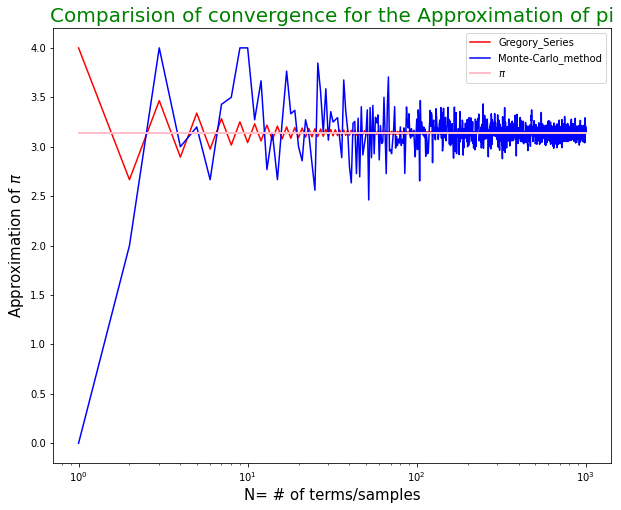

In [7]:
N=1000
x=[]
y1=[]
y2=[]
y3=[]
y2_err=[]
err_expected=[]

for i in range(1,N+1):
    x.append(i)
    y1.append(Gregory(i))
    y2.append(Monte(i))
    y3.append(np.pi)
    y2_err.append(np.abs(y2[i-1]-np.pi))
    err_expected.append(1/np.sqrt(i))
plt.figure(figsize=(10,8))
plt.semilogx(x,y1,color='red',label='Gregory_Series')
plt.semilogx(x,y2,color='blue',label='Monte-Carlo_method')
plt.semilogx(x,y3,color='pink',label='$\pi$',lw=2)
plt.title('Comparision of convergence for the Approximation of pi',fontsize=20,color='g')
plt.ylabel(f'Approximation of $\pi$',fontsize=15)
plt.xlabel("N= # of terms/samples",fontsize=15)
plt.legend()
plt.show()

## Analysis of absolute error of Monte-Carlo method for the approximation of $\pi$

In [8]:
# Do linear fit and find m and b.
def fit(x, m, c):
    return m*x**(-1/2)+c

parameters, covariance = curve_fit(fit, x, y2_err)
fit_m = parameters[0]
fit_c = parameters[1]
print(fit_m)
print(fit_c)

1.7541076784607756
-0.026407211574507095


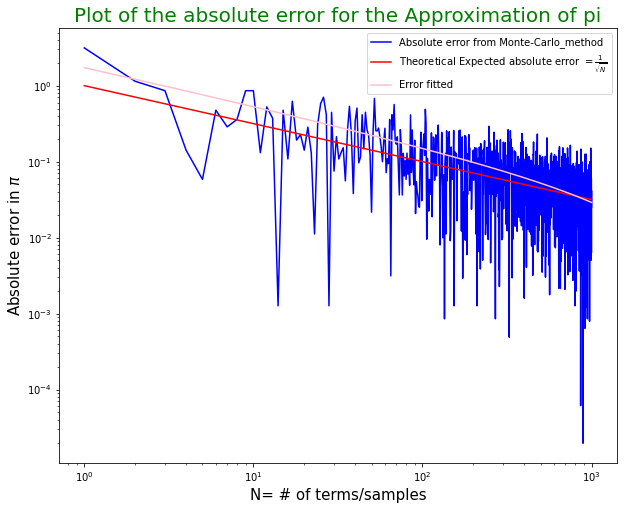

In [9]:
fit_err = fit(np.array(x), fit_m, fit_c)

plt.figure(figsize=(10,8))
plt.loglog(x,y2_err, color='blue',label='Absolute error from Monte-Carlo_method')
plt.loglog(x,err_expected, color='red',label=r'Theoretical Expected absolute error $=\frac{1}{\sqrt {N}}$')
plt.loglog(x, fit_err, label='Error fitted', color = 'pink')
plt.title('Plot of the absolute error for the Approximation of pi',fontsize=20,color='g')
plt.ylabel(f'Absolute error in $\pi$',fontsize=15)
plt.xlabel("N= # of terms/samples",fontsize=15)
plt.legend()
plt.show()


## Comparision of complexity of the two methods:
Let us say we want our approximation within a tolerance $\epsilon$ and we want to compare the methods in terms of required $N$(= number of terms in the Gregory series/number of random samples in Monte-Carlo method) for our approximation to come under the required tolerance or error in the approximation of $\pi$.

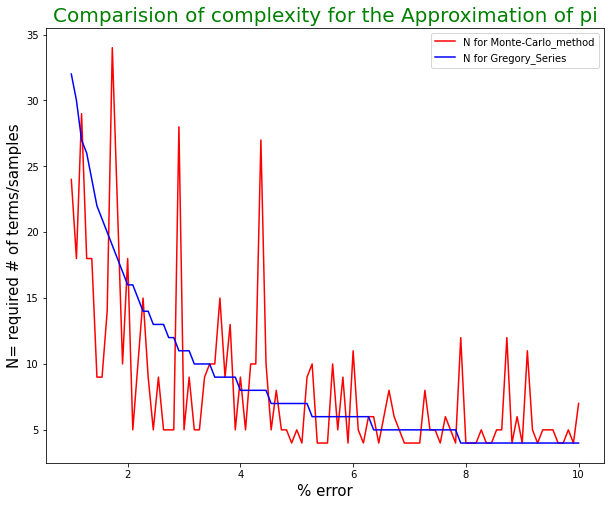

In [10]:
# tolerance, epsilon=[1%, 2%,...10%]
N_Monte=[]
N_Gregory=[]

epsilon =np.linspace(1,10,100)/100

for e in epsilon:
#Monte
    N=1
    while 1:
        y_monte=Monte(N)
        err=abs(y_monte-np.pi)
        if err<e*np.pi:
            break
        N=N+1
    N_Monte.append(N)
#Gregory
    N=1
    while 1:
        y_greg=Gregory(N)
        err=abs(y_greg-np.pi)
        if err<e*np.pi:
            break
        N=N+1
    N_Gregory.append(N)

plt.figure(figsize=(10,8))
plt.plot(100*epsilon, N_Monte,color='red',label='N for Monte-Carlo_method')
plt.plot(100*epsilon, N_Gregory,color='blue',label='N for Gregory_Series')

plt.title('Comparision of complexity for the Approximation of pi',fontsize=20,color='g')
plt.ylabel(f'N= required # of terms/samples',fontsize=15)
plt.xlabel("% error",fontsize=15)
plt.legend()
plt.show()